In [1]:
from fastai.tabular.all import *

In [1]:
matches_df = pd.read_csv('./datasets/20220212_out.csv')
matches_df.tail()

NameError: name 'pd' is not defined

In [5]:
len(matches_df)

17882

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
display_all(matches_df.tail(10).T)

,17872,17873,17874,17875,17876,17877,17878,17879,17880,17881
Unnamed: 0,17872,17873,17874,17875,17876,17877,17878,17879,17880,17881
date,2018-06-06,2018-06-06,2018-06-06,2018-06-06,2018-06-06,2018-06-07,2018-06-07,2018-06-07,2018-06-07,2018-06-07
home_team,Czech Republic,Belgium,Belarus,Zambia,Lesotho,England,Uruguay,Portugal,Iceland,India
away_team,Nigeria,Egypt,Hungary,Madagascar,Zimbabwe,Costa Rica,Uzbekistan,Algeria,Ghana,New Zealand
home_score,1,3,1,1,0,2,3,3,2,1
away_score,0,0,1,0,0,0,0,0,2,2
tournament,Friendly,Friendly,Friendly,COSAFA Cup,COSAFA Cup,Friendly,Friendly,Friendly,Friendly,Intercontinental Cup
city,Schwechat,Brussels,Brest,Polokwane,Polokwane,Leeds,Montevideo,Lisbon,Reykjavík,Mumbai
country,Austria,Belgium,Belarus,South Africa,South Africa,England,Uruguay,Portugal,Iceland,India
neutral,True,False,False,True,True,False,False,False,False,False


In [7]:
matches_df.dtypes
g = matches_df.columns.to_series().groupby(matches_df.dtypes).groups
g

{bool: ['neutral', 'is_won', 'is_stake'], int64: ['Unnamed: 0', 'home_score', 'away_score', 'score_difference', 'Other'], float64: ['rank_home', 'cur_year_avg_weighted_home', 'two_year_ago_weighted_home', 'three_year_ago_weighted_home', 'weighted_points_home', 'rank_away', 'cur_year_avg_weighted_away', 'two_year_ago_weighted_away', 'three_year_ago_weighted_away', 'weighted_points_away', 'rank_difference', 'average_rank', 'point_difference'], object: ['date', 'home_team', 'away_team', 'tournament', 'city', 'country', 'rank_date_home', 'country_full_home', 'country_abrv_home', 'rank_date_away', 'country_full_away', 'country_abrv_away', 'wc_participant']}

In [9]:
cat_names = ["is_stake", 'home_team', 'away_team']
cont_names = ["average_rank", "rank_difference", "point_difference"]

dls = TabularDataLoaders.from_df(matches_df, y_names=["home_score", "away_score"], bs=32, valid_idx=list(range(17882, 17882)),
    cat_names = cat_names,
    cont_names = cont_names,
    procs = [Categorify, Normalize, FillMissing])
dls.train.show_batch()

,is_stake,home_team,away_team,average_rank,rank_difference,point_difference,home_score,away_score
0,True,Bangladesh,Palestine,132.000000,22.000000,4.739826e-08,1.0,1.0
1,False,Pakistan,India,154.999999,40.000003,4.739826e-08,0.0,1.0
2,False,Luxembourg,Georgia,89.000000,-12.000000,8.805000e+01,1.0,0.0
3,True,El Salvador,Nicaragua,135.999999,-100.000000,4.739826e-08,1.0,0.0
4,False,Chile,Northern Ireland,37.000000,-37.999999,4.739826e-08,1.0,0.0
5,True,Romania,Denmark,17.500002,13.000000,4.739826e-08,2.0,5.0
6,True,Kuwait,Qatar,108.999999,-8.000000,4.739826e-08,1.0,0.0
7,False,Iceland,South Africa,84.500000,23.000000,4.739826e-08,1.0,0.0
8,True,Zambia,Botswana,80.500000,-42.999997,4.739826e-08,1.0,0.0
9,True,Algeria,Burkina Faso,42.000001,-20.000001,-7.049000e+01,1.0,0.0


In [49]:
learn = tabular_learner(dls, layers=[1000,500], metrics=accuracy)

SuggestedLRs(valley=0.00010964782268274575)

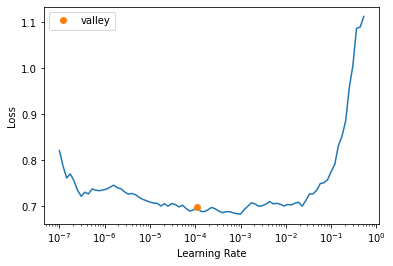

In [50]:
learn.lr_find()

In [51]:
learn.fit_one_cycle(5, 10e-3, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.668590,None,None,00:06
1,0.606979,None,None,00:06
2,0.591598,None,None,00:06
3,0.566513,None,None,00:06
4,0.565111,None,None,00:06


C:\Users\Dennis\anaconda3\envs\fastai\lib\site-packages\fastprogress\fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [47]:
learn.show_results()

,is_stake,home_team,away_team,average_rank,rank_difference,point_difference,is_won,is_won_pred
0,1.0,121.0,187.0,-0.624228,1.570559,-7.180359,0.0,0.0
1,1.0,184.0,95.0,0.008108,-0.400697,0.809603,0.0,1.0
2,2.0,164.0,22.0,0.743917,1.245206,-1.791001,0.0,0.0
3,1.0,106.0,181.0,0.456492,1.570559,-3.371435,0.0,0.0
4,1.0,116.0,192.0,-1.337044,-0.075344,1.413383,0.0,1.0
5,2.0,194.0,109.0,0.054096,-0.668634,2.328377,0.0,0.0
6,2.0,62.0,95.0,0.801402,-0.419835,1.396762,1.0,1.0
7,2.0,101.0,27.0,0.927870,0.250009,0.095192,0.0,0.0
8,2.0,114.0,68.0,1.353259,-1.070541,1.164969,1.0,0.0


In [52]:
learn.export("./model")